# Final project

1.input data



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read from csv file
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")

#set index as movie id 
ratings.set_index(['movieId'], inplace = True)
movies.set_index(['movieId'], inplace = True)
tags.set_index(['movieId'], inplace = True)

movies['year'] = movies['title'].str[-5:-1]

movies['Action'] = movies.apply(lambda x: 1 if 'Action' in x.genres else 0, axis = 1)
movies['Adventure'] = movies.apply(lambda x: 1 if 'Adventure' in x.genres else 0, axis = 1)
movies['Animation'] = movies.apply(lambda x: 1 if 'Animation' in x.genres else 0, axis = 1)
movies['Children'] = movies.apply(lambda x: 1 if 'Children' in x.genres else 0, axis = 1)
movies['Comedy'] = movies.apply(lambda x: 1 if 'Comedy' in x.genres else 0, axis = 1)
movies['Crime'] = movies.apply(lambda x: 1 if 'Crime' in x.genres else 0, axis = 1)
movies['Documentary'] = movies.apply(lambda x: 1 if 'Documentary' in x.genres else 0, axis = 1)
movies['Drama'] = movies.apply(lambda x: 1 if 'Drama' in x.genres else 0, axis = 1)
movies['Fantasy'] = movies.apply(lambda x: 1 if 'Fantasy' in x.genres else 0, axis = 1)
movies['Film-Noir'] = movies.apply(lambda x: 1 if 'Film-Noir' in x.genres else 0, axis = 1)
movies['Horror'] = movies.apply(lambda x: 1 if 'Horror' in x.genres else 0, axis = 1)
movies['Musical'] = movies.apply(lambda x: 1 if 'Musical' in x.genres else 0, axis = 1)
movies['Mystery'] = movies.apply(lambda x: 1 if 'Mystery' in x.genres else 0, axis = 1)
movies['Romance'] = movies.apply(lambda x: 1 if 'Romance' in x.genres else 0, axis = 1)
movies['Sci-Fi'] = movies.apply(lambda x: 1 if 'Sci-Fi' in x.genres else 0, axis = 1)
movies['Thriller'] = movies.apply(lambda x: 1 if 'Thriller' in x.genres else 0, axis = 1)
movies['War'] = movies.apply(lambda x: 1 if 'War' in x.genres else 0, axis = 1)
movies['Western'] = movies.apply(lambda x: 1 if 'Western' in x.genres else 0, axis = 1)
movies['Non'] = movies.apply(lambda x: 1 if 'no genres listed' in x.genres else 0, axis = 1)


#drop the timestamp column
ratings.drop(columns = 'timestamp', inplace = True)
tags.drop(columns = 'timestamp', inplace = True)

#combine the three dataframe
ratings = ratings.combine_first(movies) 
tags = tags.combine_first(movies)

ratings_order = ['title', 'year', 'userId', 'rating', 'Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
                 'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western','Non']
ratings = ratings[ratings_order]
tags_order = ['title', 'year', 'userId', 'tag', 'Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
                 'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western','Non']
tags = tags[tags_order]

#test
ratings.head()

,title,year,userId,rating,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Non
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995,1.0,4.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Toy Story (1995),1995,5.0,4.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Toy Story (1995),1995,7.0,4.5,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Toy Story (1995),1995,15.0,2.5,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Toy Story (1995),1995,17.0,4.5,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

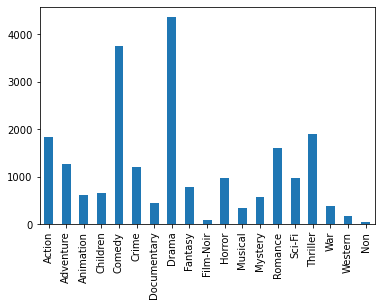

In [51]:
movies1=movies.iloc[:,3:].copy(deep=True)
movies1=movies1.sum()
movies1.plot.bar()

<AxesSubplot:xlabel='rating'>

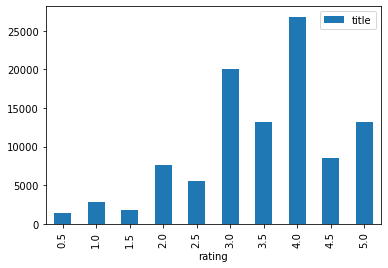

In [52]:
count_ratings=ratings.groupby('rating').agg({'title':'count'})
count_ratings.plot.bar()


user average rating is:  3.813953488372093 




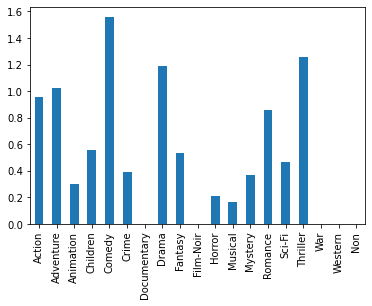

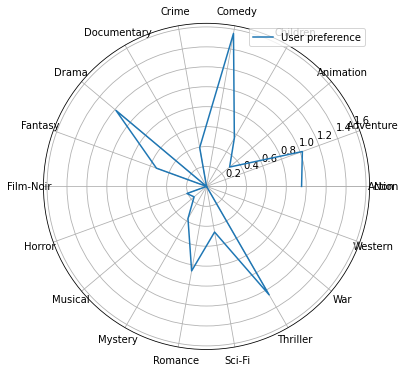

In [56]:

user1 = ratings.loc[ratings['userId'] == 456]
user1_data = user1.iloc[:, 4:].copy(deep=True)
user_rating = user1_data.mul(user1['rating'],axis = "rows")
user_rating = user_rating.sum()/user_rating.count()

user_rating.plot.bar(label='User preference')

user_avg_rating = user1['rating'].sum()/user1['rating'].count()
print('\nuser average rating is: ',user_avg_rating,'\n\n')

radar_order = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
                 'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western','Non']

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(user_rating))
plt.figure(figsize=(6, 6))
plt.subplot(polar=True)
plt.plot(label_loc, user_rating, label='User preference')
lines, labels = plt.thetagrids(np.degrees(label_loc),labels=radar_order)
plt.legend()
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

X_train = user1[['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
                 'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western','Non']]
y_train = user1["rating"]

n_value = round(user1.title.count()**0.5)

model = KNeighborsRegressor(n_neighbors=n_value)
model.fit(X=X_train, y=y_train)

X_new = pd.DataFrame(columns=['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
                 'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western','Non'], index = [0])



#test
test_movie_index = 589;
test_movie=movies.loc[movies.index == test_movie_index];
X_new.loc[0,:] = test_movie.iloc[0, 3:]

print(test_movie.iloc[0,:])
y_new = model.predict(X_new)

print('\n',test_movie.iloc[0, 0], '\nuser ID: ', user1.iloc[0,2],'\n---------------------', y_new)



title          Terminator 2: Judgment Day (1991)
genres                             Action|Sci-Fi
year                                        1991
Action                                         1
Adventure                                      0
Animation                                      0
Children                                       0
Comedy                                         0
Crime                                          0
Documentary                                    0
Drama                                          0
Fantasy                                        0
Film-Noir                                      0
Horror                                         0
Musical                                        0
Mystery                                        0
Romance                                        0
Sci-Fi                                         1
Thriller                                       0
War                                            0
Western             